# Parte1 01 Exploração de Dados

Apresentamos umas primeiras analises exploratorias. Acrescente suas respostas e codigos adicionais solicitados.


## 1. Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". As Notas variam entre 0 a 100.

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [1]:
import numpy as np
import pandas as pd

salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

### Questão 01. 
Demonstre e explique o porquê dessa conclusão estar equivocada.
   - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot. Adicionalmente acrescente outras medidas descritivas das notas de cada sala e comente na sua resposta.

<AxesSubplot:>

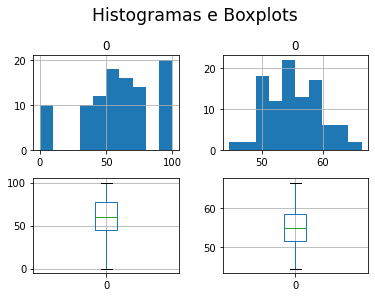

In [2]:
import matplotlib.pyplot as plt
sala1 = pd.DataFrame(salas[0])
sala2 = pd.DataFrame(salas[1])
fig, axes = plt.subplots(2, 2)
hist1 = sala1.hist(bins = 10, ax=axes[0,0])
hist2 = sala2.hist(bins = 10, ax=axes[0,1])
plt.suptitle('Histogramas e Boxplots', x=0.5, y=1.05, ha='center', fontsize='xx-large')
hist1 
hist2
box1 = sala1.boxplot(ax=axes[1,0])
box2 = sala2.boxplot(ax=axes[1,1])
box1
box2

RESPOSTA:

### Questão 02.
Calcule o número de aprovados em cada uma das salas. Isto é os que obtiveram notas superiores a 50. Conclua então qual sala têm o melhor desempenho.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [4]:
print("A sala 1 tem %d aprovados" % len(np.argwhere(np.array(sala1)>50)))
print("A sala 2 tem %d aprovados" % len(np.argwhere(np.array(sala2)>50)))

A sala 1 tem 68 aprovados
A sala 2 tem 90 aprovados


RESPOSTA:

## 2. Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data` na pasta.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.



In [5]:
import pandas as pd

iris = pd.read_csv("iris.data", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



### Questão 03.

Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto. Comente os resultados encontrados

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [6]:
import numpy as np
from scipy.stats import kurtosis, skew

for i in range(0,4):
    print("--- Variável: %d ---" % (i+1))
    print("Média: %f" % np.mean(iris[i])) 
    print("Variância: %f" % np.var(iris[i]))
    print("Obliquidade: %f" % skew(iris[i])) 
    print("Achatamento: %f\n" % kurtosis(iris[i]))  

--- Variável: 1 ---
Média: 5.843333
Variância: 0.681122
Obliquidade: 0.311753
Achatamento: -0.573568

--- Variável: 2 ---
Média: 3.054000
Variância: 0.186751
Obliquidade: 0.330703
Achatamento: 0.241443

--- Variável: 3 ---
Média: 3.758667
Variância: 3.092425
Obliquidade: -0.271712
Achatamento: -1.395359

--- Variável: 4 ---
Média: 1.198667
Variância: 0.578532
Obliquidade: -0.103944
Achatamento: -1.335246



RESPOSTA:



---

### Questão 04.

Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil). Comente na sua resposta.


Para a variável 1:
O intervalo que contém 50% dos dados é:
[5.1 6.4]
Para a variável 2:
O intervalo que contém 50% dos dados é:
[2.8 3.3]
Para a variável 3:
O intervalo que contém 50% dos dados é:
[1.6 5.1]
Para a variável 4:
O intervalo que contém 50% dos dados é:
[0.3 1.8]
Nenhuma das variáveis apresenta simetria, porém a mais próxima de um comportamento simétricos é a variável 2.


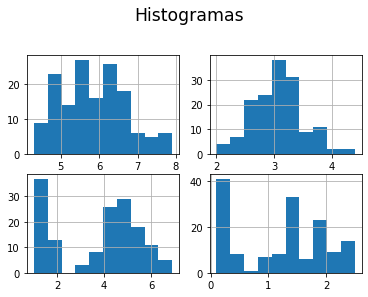

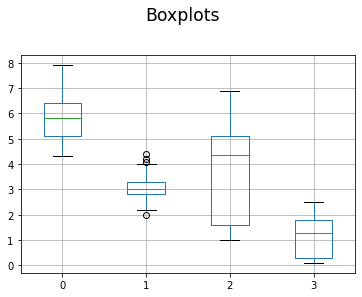

In [7]:
fig, axes = plt.subplots(2, 2)
iris[0].hist(bins = 10, ax=axes[0,0])
iris[1].hist(bins = 10, ax=axes[0,1])
iris[2].hist(bins = 10, ax=axes[1,0])
iris[3].hist(bins = 10, ax=axes[1,1])
plt.suptitle('Histogramas', x=0.5, y=1.05, ha='center', fontsize='xx-large')

fig, axes = plt.subplots(1, 1)
plt.suptitle('Boxplots', x=0.5, y=1.05, ha='center', fontsize='xx-large')
iris.boxplot()

for i in range(0,4):
  print('Para a variável %d:'% (i+1))
  print('O intervalo que contém 50% dos dados é:')
  print(np.percentile(iris[i], [25,75]))


print('Nenhuma das variáveis apresenta simetria, porém a mais próxima de um comportamento simétricos é a variável 2.')

RESPOSTA: